In [200]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [201]:
data_df = pd.read_csv('amazon_data_final.csv')


# **`OVERVIEW OF DATASET`**

In [202]:
data_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,date,Color,Pattern,Style
0,R3ED0R4VCG7DP7,B0CXL4FQBK,5.0 out of 5 stars Amazing Speaker for All Needs,Colin,5,I was in need of a new versatile portable spea...,"Reviewed in the United States June 24, 2024",AHWLZPJ4HLRGSDCGXHCEWVVOGX4Q,True,17,Color: Off White,2024-06-24,Off White,not listed,not listed
1,R7FS5ZX9N85YV,B0CXL4FQBK,5.0 out of 5 stars Concert Ready! Nice For the...,Melly Mel3,5,Color is as pictured. So pretty and vibrant.Ch...,"Reviewed in the United States August 3, 2024",AEQS3DLWRAFDJBBHMWTKH46UBBDQ,True,0,Color: Orange,2024-08-03,Orange,not listed,not listed
2,R3MI1MH02YEDHK,B0CXL4FQBK,5.0 out of 5 stars Things I wish I knew before...,Pat,5,"The media could not be loaded. So, yes 5 stars...","Reviewed in the United States May 20, 2024",AGCVXRAC7KRNWUCTJSFA2D44CDNA,True,51,Color: Forest Gray,2024-05-20,Forest Gray,not listed,not listed
3,R26O4F9FKNIYVG,B0CXL4FQBK,4.0 out of 5 stars Easy to pair.,Joseph C,4,Not a Bose flex link. But good for the price. ...,"Reviewed in the United States July 6, 2024",AEWWQRYIV3XHR6HRM6YALMVX6DPQ,True,2,Color: Black,2024-07-06,Black,not listed,not listed
4,R1SSV73W8JIH5E,B0CXL4FQBK,5.0 out of 5 stars Didn't expect the sound qua...,Mike Freeman,5,"After trying out Sony Wireless Speaker, I have...","Reviewed in the United States May 10, 2024",AFKMNV7MVRWKIXFNFEJOIYWBOUSA,True,13,Color: Off White,2024-05-10,Off White,not listed,not listed


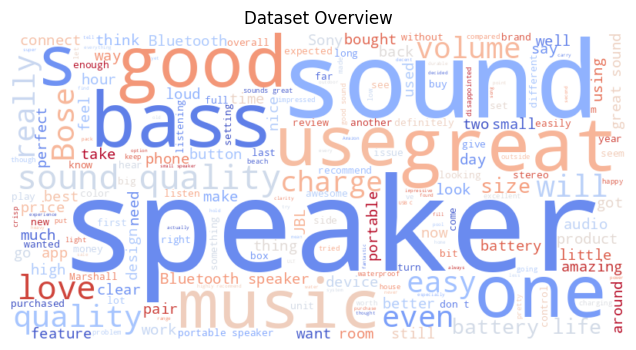

In [211]:
#wordcloud
all_reviews = ' '.join(data_df['content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='coolwarm',).generate(all_reviews)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Dataset Overview')
plt.show()

# **`STANDARDIZING`**

In [204]:
data_df['date'] = pd.to_datetime(data_df['date'])


unique_colors = data_df['Color'].unique()
print(unique_colors)


['Off White' 'Orange' 'Forest Gray' 'Black' 'White Smoke' 'Stone Blue'
 'Green' 'Chilled Lilac' 'Statement Red' 'Matte Black' 'Champagne Gold'
 'White' 'Red' 'Blue' 'Camouflage' 'Light Gray' 'not listed'
 'Black & Brass' 'Cream' 'Luxe Silver' 'Teal' 'Pink' 'Gray'
 'Signature Black' 'Oat White' 'Black Anthracite' 'Grey Mist' 'Navy'
 'Chestnut' 'Silver']


In [205]:
#standardizing colors for EDA
color_mapping = {
    'Off White': 'White',
    'Orange': 'Orange',
    'Forest Gray': 'Gray',
    'Black': 'Black',
    'White Smoke': 'White',
    'Stone Blue': 'Blue',
    'Green': 'Green',
    'Chilled Lilac': 'Lilac',
    'Statement Red': 'Red',
    'Matte Black': 'Black',
    'Champagne Gold': 'Gold',
    'White': 'White',
    'Red': 'Red',
    'Blue': 'Blue',
    'Camouflage': 'Camouflage',
    'Light Gray': 'Gray',
    'not listed': 'not listed',
    'Black & Brass': 'Black & Brass',
    'Cream': 'Cream',
    'Luxe Silver': 'Silver',
    'Teal': 'Teal',
    'Pink': 'Pink',
    'Gray': 'Gray',
    'Signature Black': 'Black',
    'Oat White': 'White',
    'Black Anthracite': 'Black',
    'Grey Mist': 'Gray',
    'Navy': 'Blue',
    'Chestnut': 'Chestnut',
    'Silver': 'Silver',
}


data_df['Standardized_Color'] = data_df['Color'].map(color_mapping)


# **`CALCULATING VALUES - MEAN, MEDIAN, MODE ETC...`**

In [213]:
#simple calculations

mode_color = data_df['Standardized_Color'].mode()[0]
print(f"Mode of Standardized Color: {mode_color}")

mean_rating = data_df['rating'].mean()
print(f"Mean Rating: {mean_rating}")

mode_rating = data_df['rating'].mode()[0]
print(f"Mode Rating: {mode_rating}")

ratings_under_4 = data_df[data_df['rating'] < 4].shape[0]
print(f"Number of ratings under 4: {ratings_under_4}")

variance_rating = data_df['rating'].var()
print(f"Variance in Rating: {variance_rating}")

Mode of Standardized Color: Black
Mean Rating: 4.494252873563219
Mode Rating: 5
Number of ratings under 4: 171
Variance in Rating: 1.062004741261251


In [214]:
#how color may affect "negative" rating ---- BASED ON MEAN
filtered_data = data_df[data_df['rating'] < 4]
mode_color_under_4 = filtered_data['Standardized_Color'].mode()[0]
print(f"Mode of Standardized Color for ratings under 4: {mode_color_under_4}")

negative_reviews = data_df[data_df['rating'] < 4]
unique_colors = negative_reviews['Standardized_Color'].unique()
print("Unique colors in negative reviews:")
print(unique_colors)

Mode of Standardized Color for ratings under 4: Black
Unique colors in negative reviews:
['Black' 'Gray' 'Silver' 'Black & Brass' 'Cream' 'Orange' 'Blue' 'White'
 'Green' 'Gold' 'Chestnut']


In [215]:
#products with most "negative" reviews ---- BASED ON MEAN
negative_reviews = data_df[data_df['rating'] < 4]
negative_review_counts = negative_reviews.groupby('product_id').size().reset_index(name='negative_review_count')
negative_review_counts_sorted = negative_review_counts.sort_values(by='negative_review_count', ascending=False)

print(negative_review_counts_sorted)

    product_id  negative_review_count
8   B0B44F1GGK                     39
1   B07YBN9XXG                     30
5   B097XX34SL                     21
7   B09XXW54QG                     20
0   B01IOD7KB6                     16
2   B08VL5S148                      8
4   B08YRT9T38                      8
10  B0CXL4FQBK                      8
12  B0D4SX9RC6                      8
9   B0CVFM97GD                      5
11  B0CY6S748H                      5
3   B08X4YMTPM                      2
6   B099TJGJ91                      1


# **`VISUALIZATIONS`**

    product_id  average_rating
6   B093SLWMS7        5.000000
4   B08X4YMTPM        4.885965
8   B099TJGJ91        4.845455
11  B0BG93TZ5N        4.842105
1   B07DD3WBYW        4.800000
3   B08VL5S148        4.690000
13  B0CXL4FQBK        4.673267
9   B09XXW54QG        4.538462
15  B0D4SX9RC6        4.530303
0   B01IOD7KB6        4.464646
14  B0CY6S748H        4.366667
7   B097XX34SL        4.350000
5   B08YRT9T38        4.151515
10  B0B44F1GGK        4.144737
2   B07YBN9XXG        4.072072
12  B0CVFM97GD        4.000000


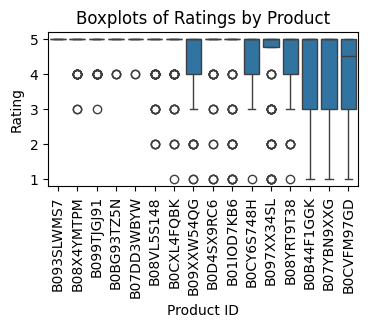

In [216]:
#average rating per product
average_rating_per_product = data_df.groupby('product_id')['rating'].mean().reset_index()
average_rating_per_product.columns = ['product_id', 'average_rating']
average_rating_per_product_sorted = average_rating_per_product.sort_values(by='average_rating', ascending=False)

print(average_rating_per_product_sorted)

plt.figure(figsize=(4, 2))
sns.boxplot(x='product_id', y='rating', data=data_df, order=average_rating_per_product_sorted['product_id'])
plt.xticks(rotation=90)
plt.title('Boxplots of Ratings by Product')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.show()


<ipython-input-217-6596ff50cb89>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


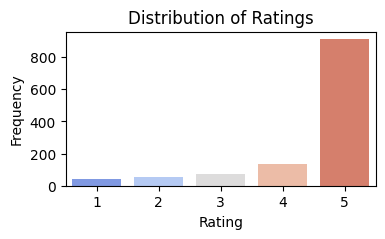

In [217]:
#distribution of ratings
rating_counts = data_df['rating'].value_counts().sort_index()

plt.figure(figsize=(4, 2))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


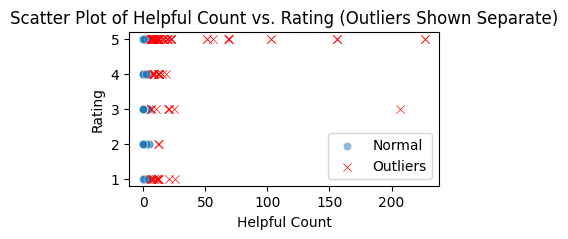

In [218]:
#helpful count vs rating, outliers shown

# IQR
Q1_helpful = data_df['helpful_count'].quantile(0.25)
Q3_helpful = data_df['helpful_count'].quantile(0.75)
IQR_helpful = Q3_helpful - Q1_helpful

lower_bound_helpful = Q1_helpful - 1.5 * IQR_helpful
upper_bound_helpful = Q3_helpful + 1.5 * IQR_helpful

clean_data = data_df[(data_df['helpful_count'] >= lower_bound_helpful) & (data_df['helpful_count'] <= upper_bound_helpful)]

plt.figure(figsize=(4, 2))
sns.scatterplot(x='helpful_count', y='rating', data=clean_data, alpha=0.5, label='Normal')
sns.scatterplot(x='helpful_count', y='rating', data=data_df[~data_df.index.isin(clean_data.index)], color='red', marker='x', label='Outliers')
plt.title('Scatter Plot of Helpful Count vs. Rating (Outliers Shown Separate)')
plt.xlabel('Helpful Count')
plt.ylabel('Rating')
plt.legend()
plt.show()

<ipython-input-224-9450449a71bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['year_month'] = data_2024['date'].dt.to_period('M')


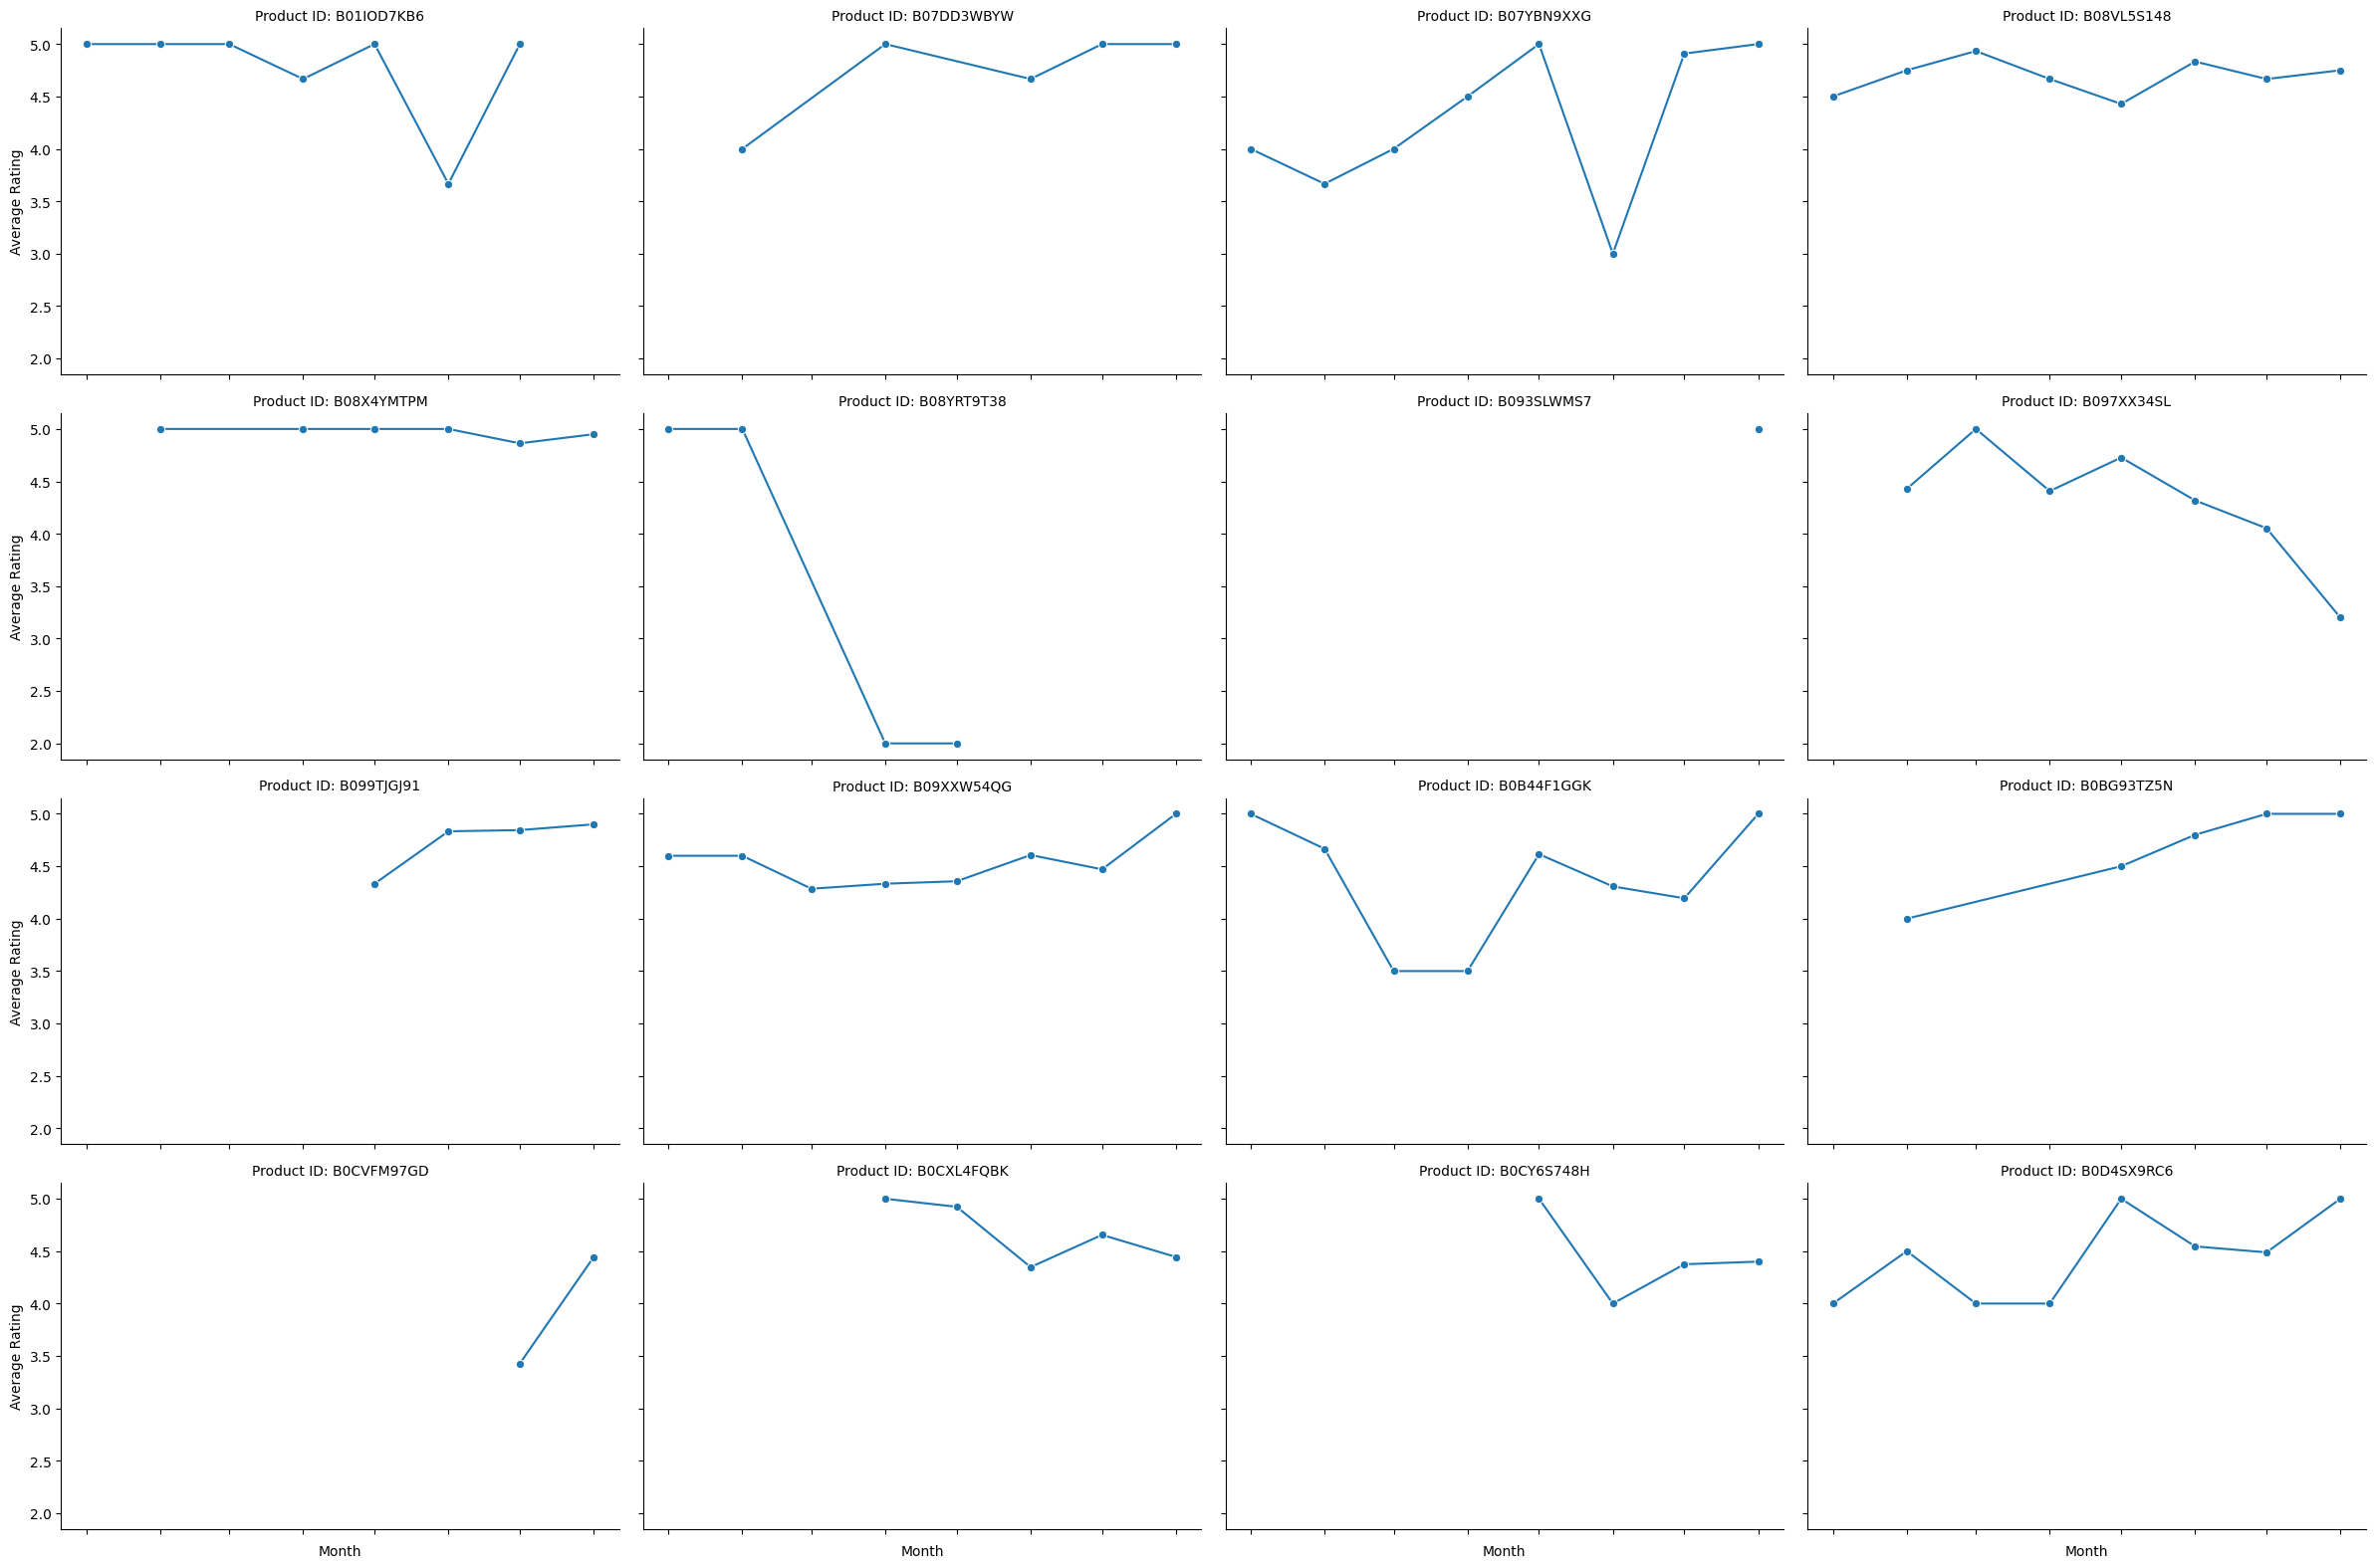

In [224]:
#reviews throughout the year 2024

data_2024 = data_df[data_df['date'].dt.year == 2024]

data_2024['year_month'] = data_2024['date'].dt.to_period('M')

monthly_ratings_2024 = data_2024.groupby(['product_id', 'year_month']).agg({'rating': 'mean'}).reset_index()
monthly_ratings_2024['year_month'] = monthly_ratings_2024['year_month'].dt.to_timestamp()

monthly_ratings_2024['month_num'] = monthly_ratings_2024['year_month'].dt.to_period('M').astype(int)

g = sns.FacetGrid(monthly_ratings_2024, col='product_id', col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, 'year_month', 'rating', marker='o')
g.set_titles(col_template='Product ID: {col_name}')
g.set_axis_labels('Month', 'Average Rating')
g.set_xticklabels(rotation=45)
plt.show()


# **`CORRELATION VALUES`**

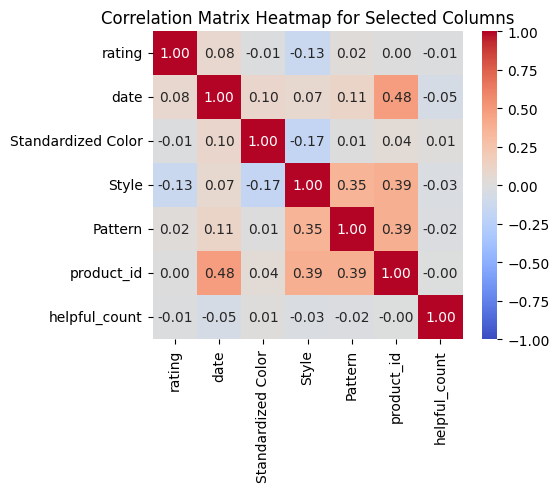

In [189]:
#heatmap
columns_of_interest = ['rating', 'date', 'Standardized Color', 'Style', 'Pattern', 'product_id', 'helpful_count']
filtered_df = data_df[columns_of_interest].copy()  # Make a copy to avoid SettingWithCopyWarning

filtered_df['date'] = pd.to_datetime(filtered_df['date']).astype(int) / 10**9  # Convert to seconds since epoch

for column in ['Standardized Color', 'Style', 'Pattern', 'product_id']:
    filtered_df[column].replace('not listed', pd.NA, inplace=True)
    filtered_df[column] = filtered_df[column].astype('category').cat.codes

correlation_matrix = filtered_df.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Selected Columns')
plt.show()

In [198]:
print("Correlation Summary:")
for i, row in enumerate(correlation_matrix.index):
    for j, col in enumerate(correlation_matrix.columns):
        if j > i:
            value = correlation_matrix.at[row, col]
            sign = 'positive' if value > 0 else 'negative' if value < 0 else 'zero'
            print(f'Correlation between {row} and {col}: {sign}')

Correlation Summary:
Correlation between rating and date: positive
Correlation between rating and Standardized Color: negative
Correlation between rating and Style: negative
Correlation between rating and Pattern: positive
Correlation between rating and product_id: positive
Correlation between rating and helpful_count: negative
Correlation between date and Standardized Color: positive
Correlation between date and Style: positive
Correlation between date and Pattern: positive
Correlation between date and product_id: positive
Correlation between date and helpful_count: negative
Correlation between Standardized Color and Style: negative
Correlation between Standardized Color and Pattern: positive
Correlation between Standardized Color and product_id: positive
Correlation between Standardized Color and helpful_count: positive
Correlation between Style and Pattern: positive
Correlation between Style and product_id: positive
Correlation between Style and helpful_count: negative
Correlation b

# **`SENTIMENT ANALYSIS`**

In [225]:
# using textblob

from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data_df['sentiment'] = data_df['content'].apply(analyze_sentiment)

def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data_df['sentiment_class'] = data_df['sentiment'].apply(classify_sentiment)

print(data_df[['content', 'sentiment', 'sentiment_class']].head())

average_sentiment = data_df['sentiment'].mean()
positive_reviews_count = (data_df['sentiment_class'] == 'positive').sum()
negative_reviews_count = (data_df['sentiment_class'] == 'negative').sum()
neutral_reviews_count = (data_df['sentiment_class'] == 'neutral').sum()

print()
print(f'Average Sentiment Score: {average_sentiment}')
print(f'Positive Reviews Count: {positive_reviews_count}')
print(f'Negative Reviews Count: {negative_reviews_count}')
print(f'Neutral Reviews Count: {neutral_reviews_count}')


                                             content  sentiment  \
0  I was in need of a new versatile portable spea...   0.243687   
1  Color is as pictured. So pretty and vibrant.Ch...   0.241667   
2  The media could not be loaded. So, yes 5 stars...   0.252130   
3  Not a Bose flex link. But good for the price. ...   0.068750   
4  After trying out Sony Wireless Speaker, I have...   0.142917   

  sentiment_class  
0        positive  
1        positive  
2        positive  
3        positive  
4        positive  

Average Sentiment Score: 0.30167187223743014
Positive Reviews Count: 1053
Negative Reviews Count: 53
Neutral Reviews Count: 112


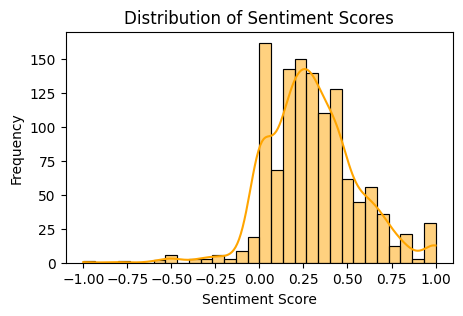

In [222]:
#frequency of sentiment
plt.figure(figsize=(5, 3))
sns.histplot(data_df['sentiment'], bins=30, kde=True, color='orange')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [223]:
#key phrases
import nltk
from textblob import TextBlob

nltk.download('punkt')

def extract_noun_phrases(text):
    blob = TextBlob(text)
    return blob.noun_phrases

positive_reviews = data_df[data_df['rating'] >= 4]
positive_reviews['noun_phrases'] = positive_reviews['content'].apply(extract_noun_phrases)

print(positive_reviews[['noun_phrases']].head())

negative_reviews = data_df[data_df['rating'] < 4]
negative_reviews['noun_phrases'] = negative_reviews['content'].apply(extract_noun_phrases)

print(negative_reviews[['noun_phrases']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-223-40351471cb34>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['noun_phrases'] = positive_reviews['content'].apply(extract_noun_phrases)


                                        noun_phrases
0  [new versatile portable speaker, summer advent...
1  [color, vibrant.charge- stays, deep, daysound ...
2  [excellent speaker, post reviews, soundit, sou...
3  [bose, ult, base, voice, ult, updated, does, e...
4  [sony wireless, teenage son, sony, attention i...
                                         noun_phrases
7   [wireless speaker, quiet voice, ca n't, music ...
45    [sound quality, great overall, easy, bluetooth]
47  ['s waterproof aspect, sound quality, price ra...
87                                   [doesn ’ t, ’ m]
93                                   [eq, especially]


<ipython-input-223-40351471cb34>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['noun_phrases'] = negative_reviews['content'].apply(extract_noun_phrases)


# **`SUMMARY`**

#1.Product Ratings and Trends

Mean Rating: The average rating across all products is approximately 4.49, indicating generally positive reviews.

Mode Rating: The most common rating is 5, which suggests a high level of customer satisfaction for many products.

Variance and Ratings Distribution: The variance in ratings is relatively low (1.06), showing that while there are some differences in ratings, the majority are concentrated around the mean. The distribution of ratings shows a peak at the higher ratings (4 and 5).

Implications: Most customers are highly satisfied with Beats by Dre products. However, there are still some reviews below the 4-star mark that could indicate areas for improvement. Regular monitoring and addressing the feedback from lower ratings could further enhance customer satisfaction.

#2.Color and Rating Correlation

Mode of Color in Negative Reviews: The most common color for products with ratings under 4 is "Black."

Color Variability: Colors like Black, Gray, Silver, and Black & Brass are common in negative reviews, but there is a diverse range of colors associated with lower ratings.

Implications: The color of the product seems to influence customer satisfaction, but the correlation is not strong. If specific colors are consistently associated with negative reviews, it might be worth exploring whether color affects the perceived quality or satisfaction of the product.

#3.Products with Most Negative Reviews

Top Products: Products like B0B44F1GGK and B07YBN9XXG have a higher number of negative reviews compared to others.

Implications: These products may have issues that need addressing. Investigating the specifics of the complaints for these products can provide insights into potential design or quality issues that need improvement.

#4.Trends Over Time

Monthly Ratings: Ratings fluctuated throughout 2024 so far, but most porducts had an increase in positive ratings towards the end of the time line (July).

Implications: Monitoring monthly trends can help identify if there are any specific times when customer satisfaction improves or declines. This can inform marketing strategies, promotional offers, or product adjustments.

#5.Sentiment Analysis

Average Sentiment Score: The average sentiment score is 0.30, indicating a generally positive sentiment.

Implications: The high number of positive reviews and the average sentiment score suggest that overall customer sentiment is positive. However, the small proportion of negative reviews should not be overlooked. Addressing common themes in negative reviews can help in improving the product and customer experience.
